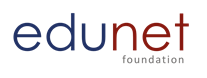

# Edunet Foundation : Class Room Exercises

## Lab 4.4 Chatbot using Hugging Face Transformers, NLTK (Natural Language Toolkit)
### Objective:
 To implement a simple chatbot using Hugging Face Transformers, NLTK (Natural Language Toolkit), and TextBlob, we'll create a basic conversational agent that can engage in a dialogue with users and perform some rudimentary natural language processing tasks

#### Prerequisites
Make sure you have Python installed on your system along with the necessary libraries. You can install the required libraries using pip:


In [ ]:
pip install transformers nltk textblob

### Steps to Implement the Chatbot


#### 1. Initialize Libraries and Import Modules
First, import the necessary libraries and modules:

In [ ]:
import nltk
from textblob import TextBlob
import random
from transformers import pipeline
from nltk.chat.util import Chat, reflections


#### 2. Define the Chatbot Responses
Create a list of patterns and responses for the chatbot using NLTK’s Chat module. This module allows you to define patterns and corresponding responses in a simple format.

In [ ]:
from nltk.chat.util import Chat, reflections

def nltk_chatbot():
    print("Hi! I'm your chatbot. You can ask me anything or say 'exit' to end the conversation.")

    # Define conversation pairs and reflections (how the bot should respond)
    pairs = [
        [
            r"my name is (.*)",
            ["Hello %1, how can I help you today?",]
        ],
        [
            r"what is your name?",
            ["My name is Chatbot and I'm here to assist you.",]
        ],
        [
            r"how are you?",
            ["I'm doing well, thank you!", "I'm good, thanks for asking.",]
        ],
        [
            r"exit",
            ["Goodbye!", "See you later!", "Have a great day!"]
        ],
        # Add more patterns and responses here
    ]

    # Create a Chat instance
    chatbot = Chat(pairs, reflections)
    
    # Start chatting
    chatbot.converse()

# Call the function to start the chatbot
nltk_chatbot()


**textblob Bot**

In [ ]:
# Define responses
responses = {
    'hi': ['Hello!', 'Hi there!', 'Hey!'],
    'how are you': ['I\'m good, thanks!', 'Doing well, thanks for asking.'],
    'bye': ['Goodbye!', 'Bye!', 'See you later!'],
    'default': ['Sorry, I didn\'t understand that.', 'Could you please repeat that?']
}

In [ ]:

# Function to generate response
def get_response(user_input):
    blob = TextBlob(user_input.lower())
    for word in blob.words:
        if word in responses:
            return random.choice(responses[word])
    return random.choice(responses['default'])

In [ ]:
# Chatting with the user
print("Chatbot: Hello! How can I help you today?")
while True:
    user_input = input("User: ").strip().lower()
    if user_input == 'exit':
        break
    response = get_response(user_input)
    print(f"Chatbot: {response}")

####  Use Hugging Face Transformers 

In [ ]:
pip install transformers torch


In [1]:
from transformers import pipeline

#pre-trained model
chatbot = pipeline("question-answering", model="gpt2")




Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at gpt2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
# Chatting with the user
while True:
    user_input = input("User: ")
    if user_input.lower() == 'exit':
        break
    response = chatbot(user_input, max_length=100, num_return_sequences=1)
    print(f"ChatGPT: {response[0]['generated_text']}")

User: hi


ValueError: h argument needs to be of type (SquadExample, dict)

In [3]:
from transformers import pipeline

# Load the lightweight question-answering model
chatbot = pipeline("question-answering", model="deepset/roberta-base-squad2")


# Example context for medical question-answering
context = """
Diabetes is a chronic medical condition in which blood sugar (glucose) levels are higher than normal. It occurs either because the pancreas does not produce enough insulin or because cells do not respond to the insulin that is produced. Common symptoms include frequent urination, increased thirst, and increased hunger. Long-term complications include cardiovascular disease, stroke, kidney failure, foot ulcers, and damage to the eyes.
"""

# Chatting with the user
while True:
    user_input = input("User: ")
    if user_input.lower() == 'exit':
        break
    response = chatbot(question=user_input, context=context)
    print(f"Chatbot: {response['answer']}"

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

C:\Users\acer\anaconda3\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\acer\.cache\huggingface\hub\models--deepset--roberta-base-squad2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

User: WHAT IS DIABETES?
Chatbot: a chronic medical condition
User: tell me more?
Chatbot: insulin


KeyboardInterrupt: Interrupted by user